# Introdução

## Qual é o problema

Dentro dos Objetivos de Desenvolvimento Sustentável (SDG's), iremos abordar o 3º objetivo: Saúde e Bem-estar, principalmente nos pilares de mortalidade infantil e mortalidade materna.

A redução da mortalidade infantil está refletida em vários Objetivos de Desenvolvimento Sustentável das Nações Unidas e é um indicador-chave do progresso humano.
A ONU espera que, até 2030, os países acabem com as mortes evitáveis ​​de recém-nascidos e crianças menores de 5 anos de idade, com todos os países visando reduzir a mortalidade neonatal para pelo menos 12 por 1.000 nascidos vivos e de menores de 5 anos para pelo menos 25 por 1.000 nascidos vivos.

Paralela à noção de mortalidade infantil está, claro, a mortalidade materna, que é responsável por 295.000 mortes durante e após a gravidez e o parto (em 2017). A grande maioria dessas mortes (94%) ocorreu em locais com poucos recursos e a maioria poderia ter sido evitada. O objetivo é reduzir a taxa de mortalidade materna globa para menos de 70 mortes por 100.000.

## Motivação e como o projeto contribui para alcançar os objetivos da SDGs

Identificar e compreender possíveis riscos durante a gestação é um importante passo para reduzir a mortalidade materna e ter cuidados apropriados no período neonatal e infantil também contribuirá para reduzir fatalidades por possíveis problemas cardíacos.

Diante do exposto, nosso trabalho visa colaborar com esses objetivos, fornecendo uma ferramenta de classificação de risco, baseada em dados de cardiotocografias.

A cardiotocografia (CTG) é usada durante a gravidez para monitorar a frequência cardíaca fetal e as contrações uterinas. É mais comumente usado no terceiro trimestre e sua finalidade é monitorar o bem-estar fetal e permitir a detecção precoce de sofrimento fetal. Um CTG anormal pode indicar a necessidade de investigações adicionais (CTG sob estresse, exame Doppler, perfil biofísico fetal, possível repetição do exame) ou até mesmo possível intervenção exigindo um parto com condições adequadas ao risco detectado.

Dessa forma, os CTGs são uma opção simples e de baixo custo para avaliar a saúde fetal, permitindo aos profissionais de saúde atuarem na prevenção da mortalidade infantil e materna. O dispositivo usado na cardiotocografia é conhecido como cardiotocógrafo. Envolve a colocação de dois transdutores no abdômen de uma mulher grávida. Um transdutor registra a frequência cardíaca fetal usando ultrassom e o outro transdutor monitora as contrações do útero medindo a tensão da parede abdominal materna (fornecendo uma indicação indireta da pressão intra-uterina). O CTG é então avaliado por uma parteira e equipe médica obstétrica. O intuito do trabalho é fornecer uma ferramenta que auxilie os profissionais de saúde a classificar corretamente os pacientes de acordo com o risco detectado. 

  
# Dados
Este conjunto de dados contém 2.126 registros de características extraídas de exames de cardiotocograma, que foram então classificados por três obstetricistas especialistas em 3 classes:
   
* Normal
* Suspeito
* Patológico

In [83]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(42)

In [84]:
data = pd.read_csv("fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [86]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

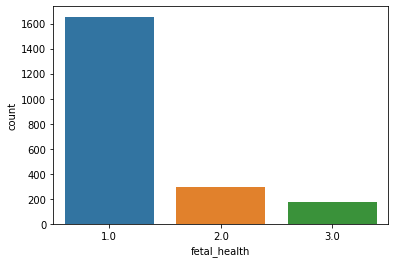

In [87]:
sns.countplot(data= data, x="fetal_health")

<AxesSubplot:>

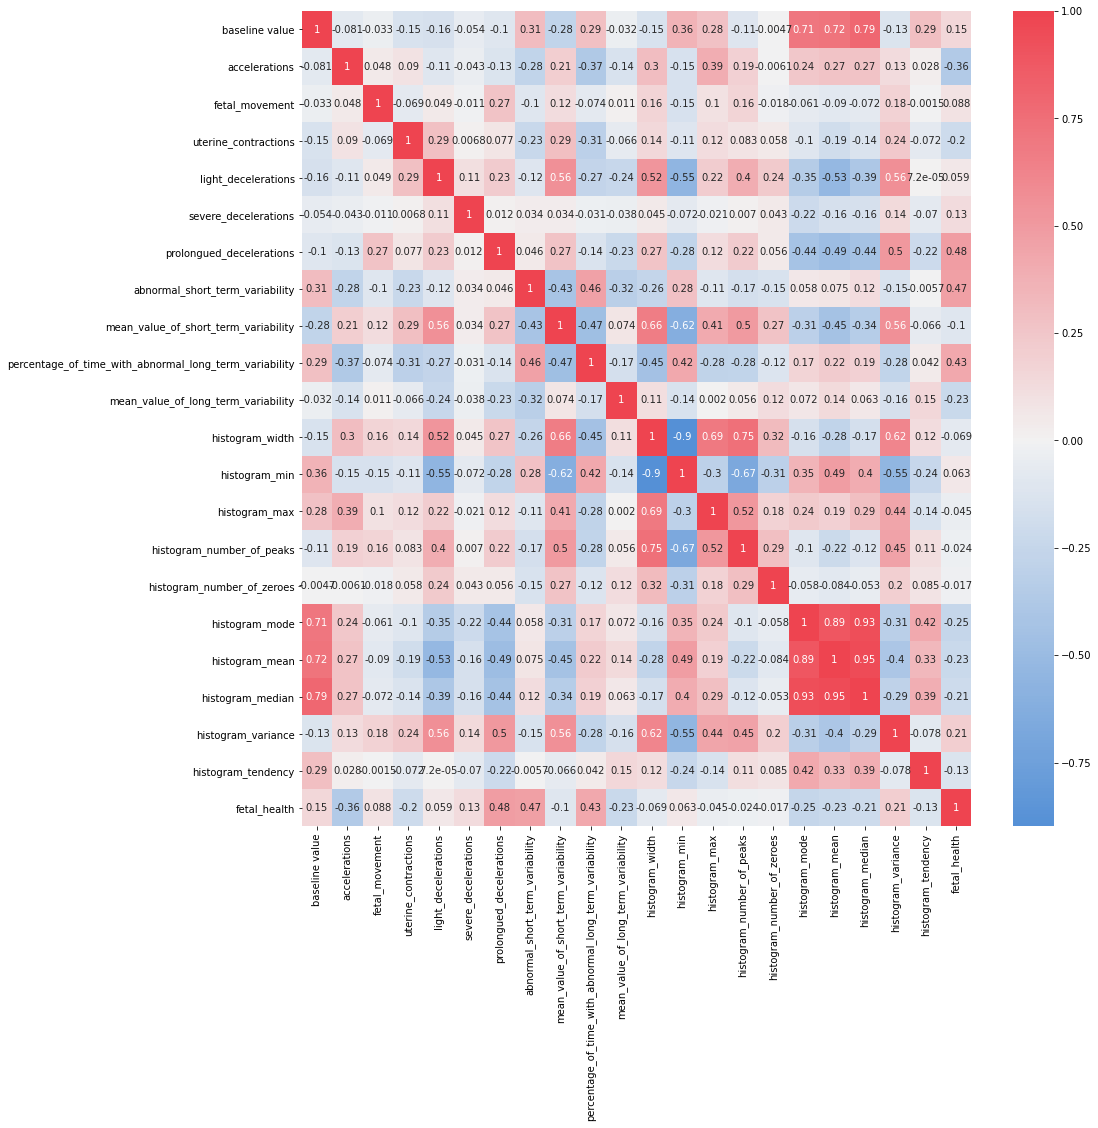

In [88]:
corrmat= data.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

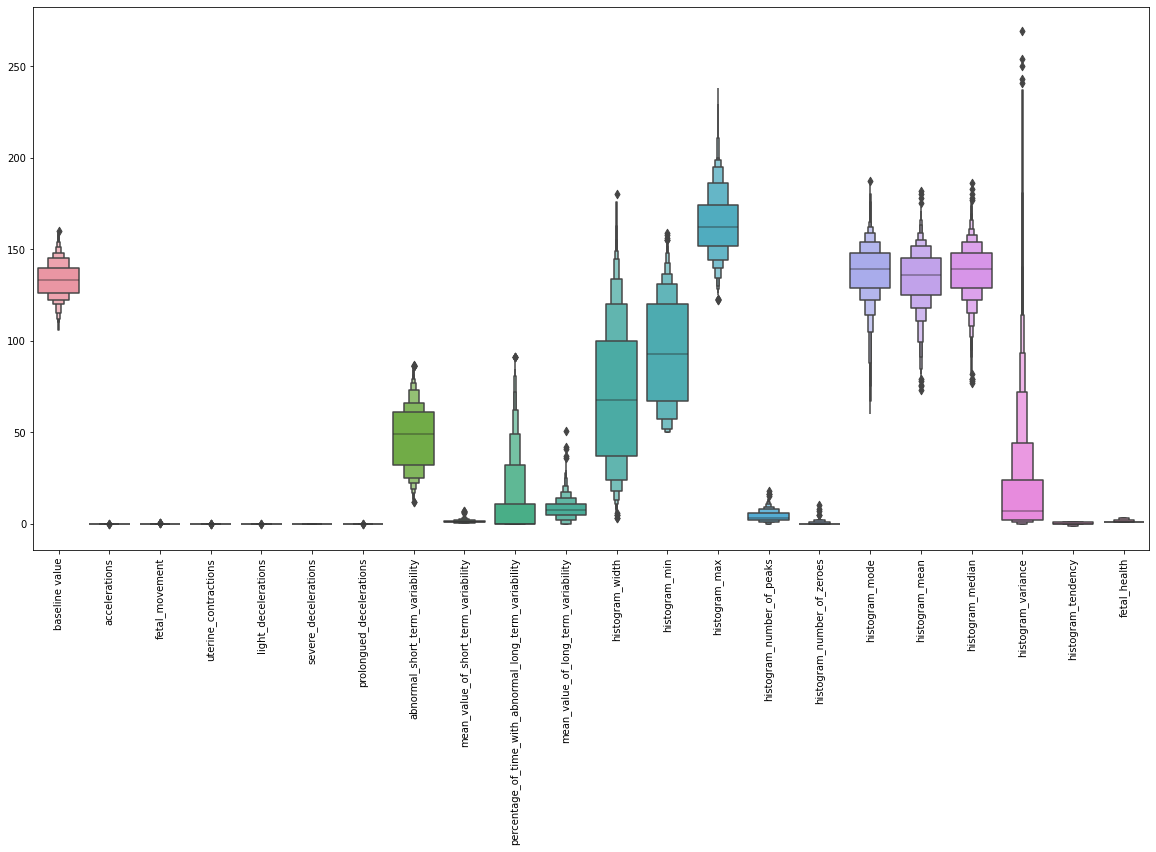

In [89]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = data)
plt.xticks(rotation=90)
plt.show()

In [90]:
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


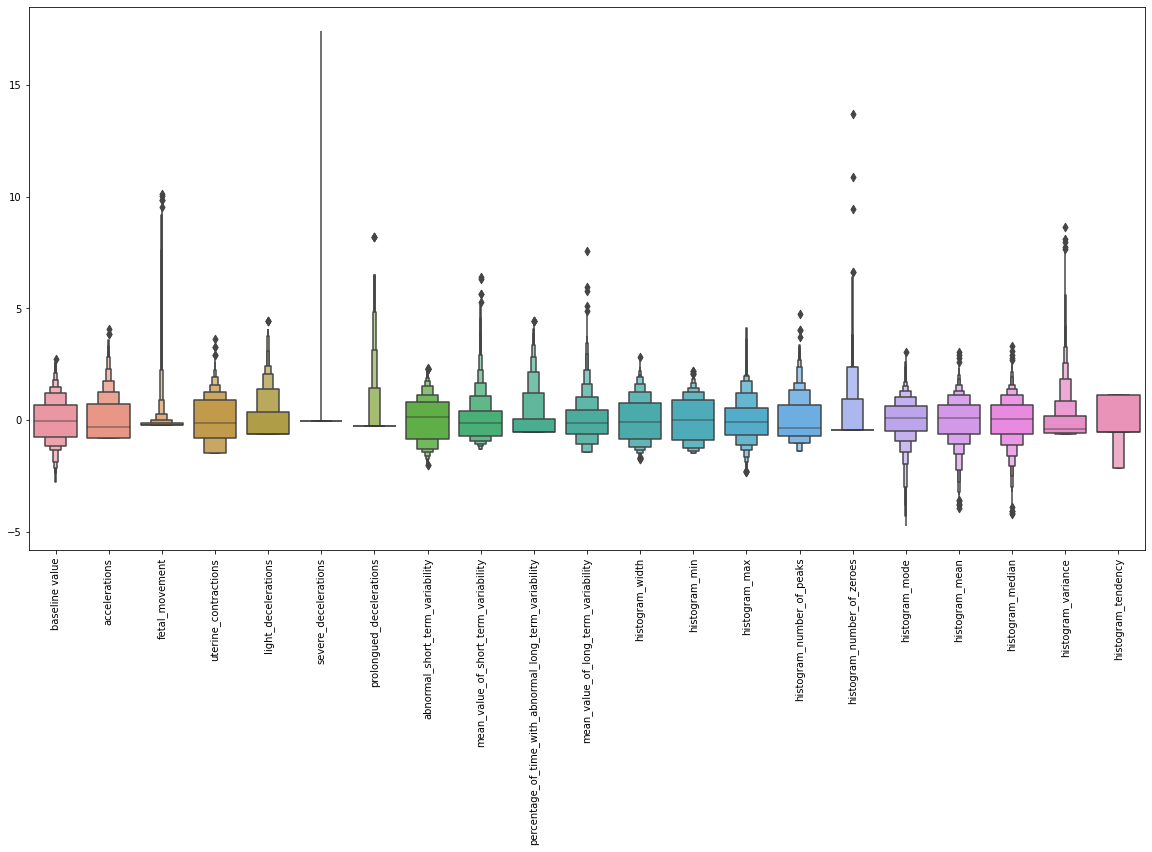

In [91]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df)
plt.xticks(rotation=90)
plt.show()

In [92]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=42)

In [93]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42,max_iter=200))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: min %f mean %f max %f " % (pipe_dict[i],cv_score.min() ,cv_score.mean(),cv_score.max()))

Logistic Regression: min 0.874214 mean 0.895240 max 0.911950 
Decision Tree: min 0.862500 mean 0.907799 max 0.931250 
RandomForest: min 0.912500 mean 0.941678 max 0.974843 
SVC: min 0.881250 mean 0.909037 max 0.931250 


In [94]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.9492481203007519


In [95]:
#Building a dictionary with list of optional values that will me analyesed by GridSearch CV
parameters = { 
    'n_estimators': [100,150, 200,500,700,900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,12,14,16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

#Fitting the trainingset to find parameter00s with best accuracy

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
CV_rfc.fit(X_train, y_train)

#Getting the outcome of gridsearch

CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'auto',
 'n_estimators': 150,
 'n_jobs': 1}

In [96]:
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.956766917293233

In [97]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Results *********
Accuracy    :  0.956766917293233
Recall      :  0.956766917293233
Precision   :  0.9560477154238874
F1 Score    :  0.956766917293233


<AxesSubplot:>

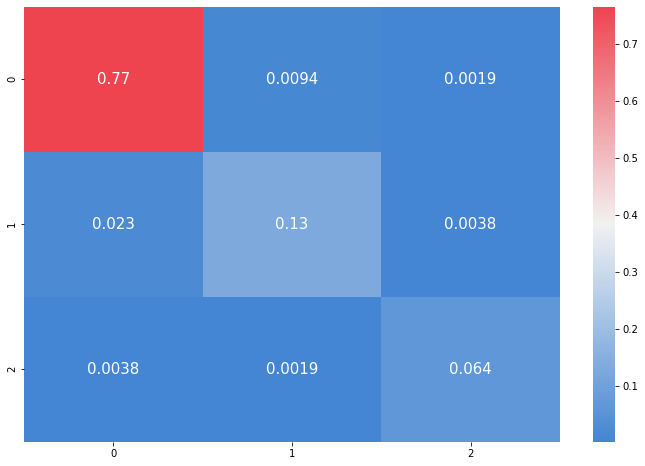

In [100]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

# Referências
ONU - Objetivos de Desenvolvimento Sustentável. https://brasil.un.org/pt-br/sdgs/3

How to read a CTG. https://geekymedics.com/how-to-read-a-ctg/

Biblioteca Virtual em Saúde. Ministério da Saúde. https://bvsms.saude.gov.br/bvs/publicacoes/manual_tecnico_gestacao_alto_risco.pdf